In [1]:
import sys
import os
import mmh3
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
%load_ext autoreload
%autoreload 2
!python -m pip install -r requirements.txt
from utils.initialization import *


# med mrjob
# names, party and twitter id
from Data.twitter_ids import twitter_ids
data = pd.DataFrame(columns=['name', "party", 'twitter_id'])
i = 0
for party in twitter_ids:
    for person in twitter_ids[party]:
        data.loc[i, :] = [person, party, twitter_ids[party][person]]
        i += 1

# tweets
filename = "Data/cleaned_data.csv"
if not os.path.exists(filename):
    os.system(f"python utils/clean_data_mrjob.py Data/tweets > Data/tmp_cleaned_data.txt")
    data_ = pd.DataFrame(columns=["name", "tweets"])
    with open("Data/tmp_cleaned_data.txt", "rb") as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            line = eval(line.decode())
            data_.loc[i,"name"] = list(line.keys())[0]
            data_.loc[i, "tweets"] = list(line.values())[0]
    data_.to_csv(filename, index = False)

data_ = pd.read_csv(filename)
data = data.merge(data_)
data.tweets = [eval(t) for t in data.tweets]
data["tokens"] = [[w for w in word_tokenize(" ".join(data["tweets"][i])) if w.isalnum()] for i in range(len(data))]
import simplemma #use simplemma instead of nltk.WordNetLemmatizer()          ### vi har addet denne linje
data["tokens"] = [[simplemma.lemmatize(w, lang='da') for w in data["tokens"][i]] for i in range(len(data))] ### vi har addet denne linje

# only include unique words
# data['tokens'] = data['tokens'].apply(lambda x: list(set(x)))

data


You should consider upgrading via the 'c:\Users\bayka\Anaconda3\envs\katrine_personal_env\python.exe -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bayka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bayka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bayka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bayka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,name,party,twitter_id,tweets,tokens
0,magnus_heunicke,socialdemokratiet,22695562,[afsætter året styrke hjælpen børn pårørende a...,"[afsætte, år, styrke, hjælp, barn, pårørende, ..."
1,nicolai_wammen,socialdemokratiet,2803948786,[dage siden sagde nyt ejendomsvurderingssystem...,"[dag, siden, sige, nytte, ejendomsvurderingssy..."
2,mattias_tesfaye,socialdemokratiet,546254893,[this is literally the same logic many th c am...,"[this, is, literally, the, same, logic, many, ..."
3,jakob_ellemann,venstre,155584627,[tide få fleksibel genåbning vores børn ældre ...,"[tide, få, fleksibel, genåbning, vores, barn, ..."
4,soren_gade,venstre,975064362359623680,[kære marianne synes burde læse lovforslaget i...,"[kære, marianne, syne, burde, læse, lovforslag..."
5,sophie_lohde,venstre,44611200,[flertallet veto dermed røde partier stort set...,"[flertal, veto, dermed, rød, parti, stor, se, ..."
6,lars_lokke,moderaterne,26201346,[mon ikke sjov form argumentation mangler lidt...,"[mon, ikke, sjov, form, argumentation, mangle,..."
7,jacob_mark,sf,2373406198,[slår fast syvtommersøm kom så godt igennem fo...,"[slå, faste, syvtommersøm, komme, så, godte, i..."
8,pia_dyhr,sf,65025162,"[stemmer nok selvom synes gør godt klaus, brug...","[stemme, nok, selvom, syne, gø, godte, klaus, ..."
9,kirsten_andersen,sf,235646319,[arbejde få medarbejdere ser virkeligheden sun...,"[arbejde, få, medarbejder, se, virkelighed, su..."


In [3]:
exclude = ['Anders_Bjarklev', 'Anders_Lund_Madsen', 'DTU', 'Michael_Kristiansen',
            'Peter_Mogensen', 'Selma_Montgomery']

# make a dataframe of the excluded names
excluded_df = data[data.name.isin(exclude)]

data = data[~data.name.isin(exclude)]          

In [4]:
def listhash(l,seed):
	val = 0
	for e in l:
		val = val ^ mmh3.hash(e, seed)
	return val 
    
def minhash(shingles_list, seed):
    """
    Input:
        - shingles_list (list of str): set of hashes
        - seed (int): seed for listhash function
    Return: minhash of given shingles
    """
    minhash_value = None
    for aShingle in shingles_list:
        hashcode = listhash([aShingle], seed)
        if minhash_value == None or hashcode < minhash_value:
            minhash_value = hashcode
    return minhash_value

def minhash2(shingles_list, k):
    """
    Input:
        - shingles_list (list of str): set of hashes
        - k (int): seed for listhash function
    Return: sequence of k minhashes
    """
    all_minhash = []
    for i in range(k):
        all_minhash.append(minhash(shingles_list, i))
    return all_minhash

In [5]:
k=300

def signature(df, dict_docs, num_hashes, on_what):
    """
    Input:
        - dict_docs (dict of str:str): dictionary of {title:document}
        - q (int)
        - num_hashes (int)
    Return: dictionary consisting of document id’s as keys and signatures as values
    """
    dict_signatures = {}
    total_texts = len(list(dict_docs.keys()))
    counter = 1
    for key,text in dict_docs.items():
        print(f'{counter}/{total_texts} - {key} - Processing...')
        doc_shingles = df[on_what][counter-1]
        minhash_values = minhash2(doc_shingles, num_hashes)
        dict_signatures[key] = minhash_values
        counter += 1
    return dict_signatures



In [6]:
def jaccard(name1, name2, signature_dict):
    """
    Input:
        - name1 (str): key of the first document S
        - name2 (str): key of the second document T
        - signatures_dict (dict of str:list): dictionary of signatures
    Return: Jaccard similarity between S and T
    """
    signatures_doc1 = np.array(signature_dict[name1])
    signatures_doc2 = np.array(signature_dict[name2])
    # return np.sum(signatures_doc1 == signatures_doc2) #/ len(signatures_doc1)
    return len(np.intersect1d(signatures_doc1, signatures_doc2))/len(np.union1d(signatures_doc1, signatures_doc2))#, np.setdiff1d(signatures_doc1, signatures_doc2)

def similar(signatures_dict, jaccard_threshold=0.01):
    """
    Input:
        - signatures_dict (dict of str:list): dictionary of signatures
        - jaccard_threshold (float): lower bound for Jaccard similarity score to consider
            two documents as similar
    Return: dictionary of similar items
    """
    list_keys = list(signatures_dict.keys())
    similar_items = {}
    for i in range (len(list_keys)-1):
        for j in range (i+1, len(list_keys)):
            similarity_score = jaccard(list_keys[i], list_keys[j], signatures_dict)
            if similarity_score >= jaccard_threshold:
                similar_items[(list_keys[i], list_keys[j])] = similarity_score
    return similar_items

In [7]:
# for every person, return the 3 people most similar to him/her
def most_similar_persons(similar_items, num_similar_persons=3):
    """
    Input:
        - similar_items (dict of tuple:str): dictionary of similar items
        - num_similar_persons (int): number of similar persons to return
    Return: dictionary of most similar persons
    """
    most_similar_persons = {}
    for key,value in similar_items.items():
        if key[0] not in most_similar_persons:
            most_similar_persons[key[0]] = [(key[1], value)]
        else:
            most_similar_persons[key[0]].append((key[1], value))
        if key[1] not in most_similar_persons:
            most_similar_persons[key[1]] = [(key[0], value)]
        else:
            most_similar_persons[key[1]].append((key[0], value))
    for key,value in most_similar_persons.items():
        most_similar_persons[key] = sorted(value, key=lambda x: x[1], reverse=True)[:num_similar_persons]
    return most_similar_persons


In [8]:


def create_sim_table(df, level, on):
    if on == 'TFIDF_Words':
        vectorizer = TfidfVectorizer(max_df=0.5, max_features=700, stop_words='english')
        vectors = vectorizer.fit_transform(df.tokens.apply(lambda x: " ".join(x)))
        dict_of_tokens={i[1]:i[0] for i in vectorizer.vocabulary_.items()}
        tfidf_vectors = []  # all deoc vectors by tfidf
        for row in vectors:
            tfidf_vectors.append({dict_of_tokens[column]:value for (column,value) in zip(row.indices,row.data)})
        df['TFIDF_Words'] = [list(tfidf_vectors[i].keys()) for i in range(len(df))]
    elif on == 'tokens':
        pass
    
    dict_docs = {i:j for i,j in zip(df[level],df[on])}
    signature_dict = signature(df, dict_docs, num_hashes = 300, on_what = on)
    found_similar_items = similar(signature_dict)
    most_similar_items = sorted(found_similar_items.items(), key=lambda x: x[1], reverse=True)
    most_similar_persons_res = most_similar_persons(found_similar_items)

    # convert most_similar_persons_res to a datamframe for easier visualization
    most_similar_persons_df = pd.DataFrame.from_dict(most_similar_persons_res, orient='index')
    if level == 'name':
        most_similar_persons_df.columns = ['Most similar person 1', 'Most similar person 2', 'Most similar person 3']
    elif level == 'party':
        most_similar_persons_df.columns = ['Most similar party 1', 'Most similar party 2', 'Most similar party 3']
    return most_similar_persons_df



In [9]:
# for each politician 
create_sim_table(data, 'name','tokens')

1/33 - magnus_heunicke - Processing...
2/33 - nicolai_wammen - Processing...
3/33 - mattias_tesfaye - Processing...
4/33 - jakob_ellemann - Processing...
5/33 - soren_gade - Processing...
6/33 - sophie_lohde - Processing...
7/33 - lars_lokke - Processing...
8/33 - jacob_mark - Processing...
9/33 - pia_dyhr - Processing...
10/33 - kirsten_andersen - Processing...
11/33 - dennis_flydtkjær - Processing...
12/33 - peter_skaarup - Processing...
13/33 - soren_espersen - Processing...
14/33 - alex_vanopslagh - Processing...
15/33 - ole_olesen - Processing...
16/33 - soren_pape - Processing...
17/33 - mette_abildgaard - Processing...
18/33 - rasmus_jarlov - Processing...
19/33 - pelle_dragsted - Processing...
20/33 - mai_villadsen - Processing...
21/33 - rosa_lund - Processing...
22/33 - martin_lidegaard - Processing...
23/33 - samira_nawa - Processing...
24/33 - katrine_robsoe - Processing...
25/33 - pernille_vermund - Processing...
26/33 - lars_mathiesen - Processing...
27/33 - kim_andersen 

,Most similar person 1,Most similar person 2,Most similar person 3
magnus_heunicke,"(kirsten_andersen, 0.14942528735632185)","(mette_abildgaard, 0.14722753346080306)","(lars_lokke, 0.1450381679389313)"
nicolai_wammen,"(soren_pape, 0.1320754716981132)","(katrine_robsoe, 0.1320754716981132)","(dennis_flydtkjær, 0.12994350282485875)"
mattias_tesfaye,"(jakob_ellemann, 0.14285714285714285)","(peter_skaarup, 0.13851992409867173)","(alex_vanopslagh, 0.13851992409867173)"
jakob_ellemann,"(sophie_lohde, 0.1952191235059761)","(soren_pape, 0.19284294234592445)","(alex_vanopslagh, 0.17647058823529413)"
soren_gade,"(pernille_vermund, 0.08499095840867993)","(kirsten_andersen, 0.08108108108108109)","(rosa_lund, 0.08108108108108109)"
sophie_lohde,"(jakob_ellemann, 0.1952191235059761)","(soren_pape, 0.18811881188118812)","(mette_abildgaard, 0.17416829745596868)"
lars_lokke,"(alex_vanopslagh, 0.18110236220472442)","(rosa_lund, 0.18110236220472442)","(jakob_ellemann, 0.1695906432748538)"
jacob_mark,"(kirsten_andersen, 0.18811881188118812)","(lars_lokke, 0.16054158607350097)","(rasmus_jarlov, 0.1583011583011583)"
pia_dyhr,"(mette_abildgaard, 0.171875)","(sophie_lohde, 0.1695906432748538)","(kirsten_andersen, 0.1650485436893204)"
kirsten_andersen,"(jacob_mark, 0.18811881188118812)","(jakob_ellemann, 0.1650485436893204)","(pia_dyhr, 0.1650485436893204)"


In [10]:
# for each party
create_sim_table(data, 'party','TFIDF_Words')

1/12 - socialdemokratiet - Processing...
2/12 - venstre - Processing...
3/12 - moderaterne - Processing...
4/12 - sf - Processing...
5/12 - danmarksdemokraterne - Processing...
6/12 - liberal_alliance - Processing...
7/12 - konservative - Processing...
8/12 - enhedslisten - Processing...
9/12 - radikale - Processing...
10/12 - nye_borgerlige - Processing...
11/12 - alternativet - Processing...
12/12 - dansk_folkeparti - Processing...


,Most similar party 1,Most similar party 2,Most similar party 3
socialdemokratiet,"(moderaterne, 0.2219959266802444)","(konservative, 0.20724346076458752)","(liberal_alliance, 0.19760479041916168)"
venstre,"(moderaterne, 0.12149532710280374)","(dansk_folkeparti, 0.11524163568773234)","(socialdemokratiet, 0.1111111111111111)"
moderaterne,"(dansk_folkeparti, 0.2422360248447205)","(socialdemokratiet, 0.2219959266802444)","(liberal_alliance, 0.18110236220472442)"
sf,"(dansk_folkeparti, 0.2145748987854251)","(konservative, 0.19760479041916168)","(liberal_alliance, 0.171875)"
danmarksdemokraterne,"(moderaterne, 0.06382978723404255)","(dansk_folkeparti, 0.050788091068301226)","(sf, 0.04529616724738676)"
liberal_alliance,"(dansk_folkeparti, 0.20724346076458752)","(socialdemokratiet, 0.19760479041916168)","(konservative, 0.19047619047619047)"
konservative,"(socialdemokratiet, 0.20724346076458752)","(sf, 0.19760479041916168)","(liberal_alliance, 0.19047619047619047)"
enhedslisten,"(nye_borgerlige, 0.21951219512195122)","(socialdemokratiet, 0.19284294234592445)","(sf, 0.15384615384615385)"
radikale,"(nye_borgerlige, 0.19047619047619047)","(alternativet, 0.15606936416184972)","(enhedslisten, 0.14942528735632185)"
nye_borgerlige,"(enhedslisten, 0.21951219512195122)","(radikale, 0.19047619047619047)","(socialdemokratiet, 0.1834319526627219)"


In [11]:
create_sim_table(data, 'party','tokens')

1/12 - socialdemokratiet - Processing...
2/12 - venstre - Processing...
3/12 - moderaterne - Processing...
4/12 - sf - Processing...
5/12 - danmarksdemokraterne - Processing...
6/12 - liberal_alliance - Processing...
7/12 - konservative - Processing...
8/12 - enhedslisten - Processing...
9/12 - radikale - Processing...
10/12 - nye_borgerlige - Processing...
11/12 - alternativet - Processing...
12/12 - dansk_folkeparti - Processing...


,Most similar party 1,Most similar party 2,Most similar party 3
socialdemokratiet,"(nye_borgerlige, 0.14942528735632185)","(konservative, 0.1450381679389313)","(liberal_alliance, 0.1342155009451796)"
venstre,"(alternativet, 0.12994350282485875)","(konservative, 0.12570356472795496)","(sf, 0.12149532710280374)"
moderaterne,"(sf, 0.14285714285714285)","(dansk_folkeparti, 0.13851992409867173)","(liberal_alliance, 0.1320754716981132)"
sf,"(liberal_alliance, 0.1952191235059761)","(konservative, 0.1695906432748538)","(nye_borgerlige, 0.1650485436893204)"
danmarksdemokraterne,"(nye_borgerlige, 0.08108108108108109)","(sf, 0.07913669064748201)","(konservative, 0.07719928186714542)"
liberal_alliance,"(sf, 0.1952191235059761)","(radikale, 0.1695906432748538)","(konservative, 0.16054158607350097)"
konservative,"(sf, 0.1695906432748538)","(liberal_alliance, 0.16054158607350097)","(enhedslisten, 0.16054158607350097)"
enhedslisten,"(nye_borgerlige, 0.18811881188118812)","(konservative, 0.16054158607350097)","(sf, 0.15606936416184972)"
radikale,"(liberal_alliance, 0.1695906432748538)","(nye_borgerlige, 0.1650485436893204)","(sf, 0.15606936416184972)"
nye_borgerlige,"(enhedslisten, 0.18811881188118812)","(sf, 0.1650485436893204)","(radikale, 0.1650485436893204)"


# Recommendation system 

# Make a function that takes one person, and recommends the top 3 politicians and the top 3 parties they agree with. 


In [12]:

# Add the people we want to test for 
include = ['Anders_Bjarklev', 'Anders_Lund_Madsen', 'DTU', 'Michael_Kristiansen',
            'Peter_Mogensen', 'Selma_Montgomery']

data_include = data.append(excluded_df, ignore_index=True)

C:\Users\bayka\AppData\Local\Temp\ipykernel_10040\2474703514.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_include = data.append(excluded_df, ignore_index=True)


In [13]:


def create_docs(df, level, on):
    if on == 'TFIDF_Words':
        vectorizer = TfidfVectorizer(max_df=0.5, max_features=700, stop_words='english')
        vectors = vectorizer.fit_transform(df.tokens.apply(lambda x: " ".join(x)))
        dict_of_tokens={i[1]:i[0] for i in vectorizer.vocabulary_.items()}
        tfidf_vectors = []  # all deoc vectors by tfidf
        for row in vectors:
            tfidf_vectors.append({dict_of_tokens[column]:value for (column,value) in zip(row.indices,row.data)})
        df['TFIDF_Words'] = [list(tfidf_vectors[i].keys()) for i in range(len(df))]
    elif on == 'tokens':
        pass
   
    dict_docs = {i:j for i,j in zip(df[level],df[on])}
    signature_dict = signature(df, dict_docs,  300, on)
    found_similar_items = similar(signature_dict)
    most_similar_items = sorted(found_similar_items.items(), key=lambda x: x[1], reverse=True)
    most_similar_persons_res = most_similar_persons(found_similar_items)
    return dict_docs,signature_dict

dict_docs,signature_dict = create_docs(data_include,'name','TFIDF_Words')


1/33 - magnus_heunicke - Processing...
2/33 - nicolai_wammen - Processing...
3/33 - mattias_tesfaye - Processing...
4/33 - jakob_ellemann - Processing...
5/33 - soren_gade - Processing...
6/33 - sophie_lohde - Processing...
7/33 - lars_lokke - Processing...
8/33 - jacob_mark - Processing...
9/33 - pia_dyhr - Processing...
10/33 - kirsten_andersen - Processing...
11/33 - dennis_flydtkjær - Processing...
12/33 - peter_skaarup - Processing...
13/33 - soren_espersen - Processing...
14/33 - alex_vanopslagh - Processing...
15/33 - ole_olesen - Processing...
16/33 - soren_pape - Processing...
17/33 - mette_abildgaard - Processing...
18/33 - rasmus_jarlov - Processing...
19/33 - pelle_dragsted - Processing...
20/33 - mai_villadsen - Processing...
21/33 - rosa_lund - Processing...
22/33 - martin_lidegaard - Processing...
23/33 - samira_nawa - Processing...
24/33 - katrine_robsoe - Processing...
25/33 - pernille_vermund - Processing...
26/33 - lars_mathiesen - Processing...
27/33 - kim_andersen 

In [14]:
b,r = 100, 10
# assert k == b*r

def lsh(signatures_dict, jaccard_threshold, seed=10):
    lsh_dict = {}
    for key, values in signatures_dict.items():
        blocks = np.split(np.array(values), b)
        blocks_hash_values = []
        for aBlock in blocks:
            blocks_hash_values.append(mmh3.hash(aBlock, seed))
        lsh_dict[key] = blocks_hash_values
    list_keys = list(lsh_dict.keys())
    similar_items = {}
    for i in range (len(list_keys)-1):
        for j in range (i+1, len(list_keys)):
            common_values = np.intersect1d(lsh_dict[list_keys[i]], lsh_dict[list_keys[j]])
            if len(common_values) > 0:
                # we found a candidate
                similarity_score = jaccard(list_keys[i], list_keys[j], signatures_dict)
                if similarity_score >= jaccard_threshold:
                    similar_items[(list_keys[i], list_keys[j])] = similarity_score
    return similar_items
found_similar_items_with_lsh = lsh(signature_dict, 0.01)


In [15]:

def most_similar_persons_lsh(similar_items, num_similar_persons=3, names = include, level= None, on= None):
    """
    Input:
        - similar_items (dict of tuple:str): dictionary of similar items
        - num_similar_persons (int): number of similar persons to return
        - names (list of str): list of names to include
    Return: dictionary of most similar persons
    """

    ##### TODO 
    # lav et if statement der gør, at hvis most_smiliar_person_1 er i include --> fjern denne 
    
    most_similar_persons = {}
    for key,value in similar_items.items():
        if key[0] not in most_similar_persons:
            most_similar_persons[key[0]] = [(key[1], value)]
        else:
            most_similar_persons[key[0]].append((key[1], value))
        if key[1] not in most_similar_persons:
            most_similar_persons[key[1]] = [(key[0], value)]
        else:
            most_similar_persons[key[1]].append((key[0], value))
    for key,value in most_similar_persons.items():
        most_similar_persons[key] = sorted(value, key=lambda x: x[1], reverse=True)[:num_similar_persons]
        # convert most_similar_persons_res to a datamframe for easier visualization

    most_similar_persons = pd.DataFrame.from_dict(most_similar_persons, orient='index')
    if level == 'name':
        most_similar_persons.columns = ['Most similar person 1', 'Most similar person 2', 'Most similar person 3']
    elif level == 'party':
        most_similar_persons.columns = ['Most similar party 1', 'Most similar party 2', 'Most similar party 3']
    return most_similar_persons[most_similar_persons.index.isin(include)]


    # return most_similar_persons
    # return most_similar_persons[most_similar_persons.name.isin(names)]

In [16]:
most_similar_persons_lsh(found_similar_items_with_lsh, 3, include, 'name', 'TFIDF_Words')

,Most similar person 1,Most similar person 2,Most similar person 3


# make a correlation matrix of the politicians and parties.


In [17]:
found_similar_items_with_lsh = lsh(signature_dict, 0.3)

In [18]:
# Heatmap of jaccard similarities
#create matrix manually

#signature_dict to be used in jaccard
#dict_docs = {i:j for i,j in zip(data["name"],data["TFIDF_Words"])}
#signature_dict = signature(data, dict_docs, num_hashes = 300, on_what='TFIDF_Words')

dict_docs,signature_dict = create_docs(data,'name','TFIDF_Words')

n_partym = data.name.unique()
partym_matrix = np.zeros((len(n_partym), len(n_partym)))
for i, partm in enumerate(n_partym):
    for j, partm_next in enumerate(n_partym):
        #append to matrix 
        partym_matrix[i,j] = jaccard(data.name.iloc[i], data.name.iloc[j], signature_dict)


1/33 - magnus_heunicke - Processing...
2/33 - nicolai_wammen - Processing...
3/33 - mattias_tesfaye - Processing...
4/33 - jakob_ellemann - Processing...
5/33 - soren_gade - Processing...
6/33 - sophie_lohde - Processing...
7/33 - lars_lokke - Processing...
8/33 - jacob_mark - Processing...
9/33 - pia_dyhr - Processing...
10/33 - kirsten_andersen - Processing...
11/33 - dennis_flydtkjær - Processing...
12/33 - peter_skaarup - Processing...
13/33 - soren_espersen - Processing...
14/33 - alex_vanopslagh - Processing...
15/33 - ole_olesen - Processing...
16/33 - soren_pape - Processing...
17/33 - mette_abildgaard - Processing...
18/33 - rasmus_jarlov - Processing...
19/33 - pelle_dragsted - Processing...
20/33 - mai_villadsen - Processing...
21/33 - rosa_lund - Processing...
22/33 - martin_lidegaard - Processing...
23/33 - samira_nawa - Processing...
24/33 - katrine_robsoe - Processing...
25/33 - pernille_vermund - Processing...
26/33 - lars_mathiesen - Processing...
27/33 - kim_andersen 

<AxesSubplot:xlabel='name'>

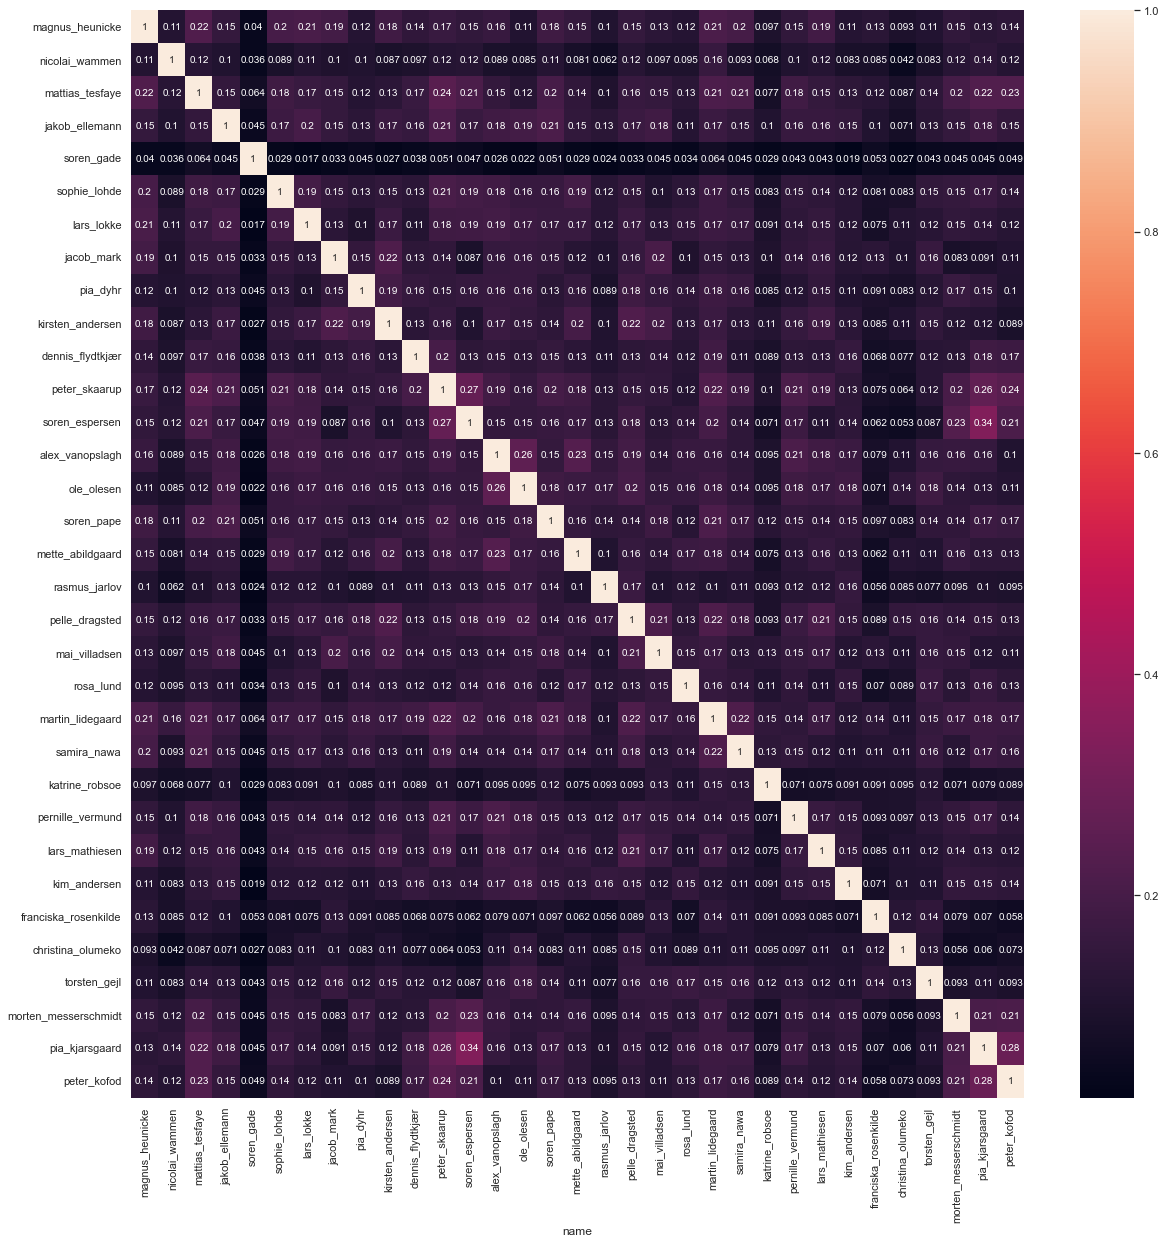

In [19]:
import seaborn as sns
jac_sim = pd.DataFrame(partym_matrix, columns=data.name, index=data.name)
jac_sim.index.name = None
jac_sim

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(jac_sim, ax=ax, xticklabels=True, yticklabels=True, annot=True)